# Data Cleaning

### Import Libraries and Set Configs

In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

In [2]:
# Set options and configs

pd.set_option('display.float_format', lambda x: f'{x:.2f}')


In [3]:
# Set constant variables

DATA_PATH = '../data/'

### Load Data

In [4]:
# Climate Change data
df = pd.read_csv(DATA_PATH + 'raw/climate-change.csv')

# Preview Climate Change data
print(f"Climate Change data: {df.shape}")
df.head()


Climate Change data: (6510, 39)


,Country Name,Time,Access to electricity (% of population),Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),"Agriculture, forestry, and fishing, value added (% of GDP)",Arable land (hectares),"Annual freshwater withdrawals, total (% of internal resources)","Annual freshwater withdrawals, total (billion cubic meters)",CO2 emissions (kt),...,"School enrollment, primary and secondary (gross), gender parity index (GPI)",Terrestrial and marine protected areas (% of total territorial area),Total greenhouse gas emissions (kt of CO2 equivalent),Urban population,Urban population (% of total population),Population in urban agglomerations of more than 1 million (% of total population),Population growth (annual %),GDP (current US$),GDP per capita (current US$),GDP growth (annual %)
0,Afghanistan,1990,NaN,NaN,58.27,NaN,7910000.00,NaN,NaN,2960.00,...,NaN,NaN,15180.00,2628555.00,21.18,12.48,4.48,NaN,NaN,NaN
1,Afghanistan,1991,NaN,NaN,58.25,NaN,7910000.00,NaN,NaN,2740.00,...,0.54,NaN,15100.00,2828169.00,21.27,12.17,6.90,NaN,NaN,NaN
2,Afghanistan,1992,NaN,NaN,58.25,NaN,7910000.00,49.76,23.46,1430.00,...,NaN,NaN,13630.00,3093388.00,21.36,11.68,8.55,NaN,NaN,NaN
3,Afghanistan,1993,NaN,NaN,58.10,NaN,7824000.00,NaN,NaN,1360.00,...,0.36,NaN,13460.00,3391712.00,21.44,11.17,8.79,NaN,NaN,NaN
4,Afghanistan,1994,NaN,NaN,57.92,NaN,7703000.00,NaN,NaN,1300.00,...,0.43,NaN,13270.00,3677087.00,21.53,10.81,7.66,NaN,NaN,NaN


### Clean Data

In [5]:
# Count missing values
df.isnull().sum().sort_values()

Country Name                                                                               0
Time                                                                                       0
Population, total                                                                         11
Population growth (annual %)                                                              14
Urban population (% of total population)                                                  68
Urban population                                                                          71
Forest area (sq. km)                                                                     170
Forest area (% of land area)                                                             186
Renewable energy consumption (% of total final energy consumption)                       439
GDP (current US$)                                                                        518
GDP per capita (current US$)                                          

In [6]:
# Drop columns with missing values > 15%
df.dropna(axis=1, thresh=int(0.85 * len(df)), inplace=True)

# Fix data types
df['Time'] = df['Time'].astype(int)

# Get datasets info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6510 entries, 0 to 6509
Data columns (total 22 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Country Name                                                                       6510 non-null   object 
 1   Time                                                                               6510 non-null   int64  
 2   Access to electricity (% of population)                                            5681 non-null   float64
 3   Agricultural land (% of land area)                                                 5954 non-null   float64
 4   Arable land (hectares)                                                             5885 non-null   float64
 5   CO2 emissions (kt)                                                                 5538 non-null   float

In [7]:

#  Get dataset descriptive analysis
df.describe()

,Time,Access to electricity (% of population),Agricultural land (% of land area),Arable land (hectares),CO2 emissions (kt),CO2 emissions (metric tons per capita),Forest area (% of land area),Forest area (sq. km),Methane emissions (kt of CO2 equivalent),"Mortality rate, under-5 (per 1,000 live births)",...,"Population, total",Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total final energy consumption),Total greenhouse gas emissions (kt of CO2 equivalent),Urban population,Urban population (% of total population),Population growth (annual %),GDP (current US$),GDP per capita (current US$),GDP growth (annual %)
count,6510.00,5681.00,5954.00,5885.00,5538.00,5535.00,6324.00,6340.00,5536.00,5790.00,...,6499.00,5646.00,6071.00,5535.00,6439.00,6442.00,6496.00,5992.00,5989.00,5854.00
mean,2004.50,81.12,37.41,6592934.04,138259.55,4.28,32.64,194631.28,38267.60,48.21,...,29804059.02,28.61,30.47,193509.95,14865850.00,56.91,1.45,253121860436.44,12591.59,3.49
std,8.66,29.64,22.14,20899106.93,634756.86,5.41,24.80,759142.22,114197.75,51.89,...,120968197.99,33.79,30.69,784739.86,51538497.49,24.53,1.52,1164850022131.13,20863.78,6.25
min,1990.00,0.53,0.45,135.00,0.00,0.00,0.00,0.00,0.00,1.80,...,8910.00,0.00,0.00,10.00,3623.00,5.42,-10.96,8824447.74,22.80,-64.05
25%,1997.00,70.31,18.79,60000.00,1350.00,0.57,10.98,1376.61,2100.00,10.80,...,612545.50,0.00,3.27,7150.00,339678.50,35.92,0.47,3014494468.47,1061.34,1.34
50%,2004.50,99.38,38.41,1038400.00,8615.00,2.29,30.74,19831.57,8340.00,26.40,...,5303294.00,11.99,18.90,28080.00,2618588.00,56.41,1.33,12994711903.62,3728.11,3.65
75%,2012.00,100.00,54.81,3900000.00,57765.00,6.33,51.84,96040.12,27540.00,70.28,...,18132346.00,54.06,52.67,89540.00,8483050.50,76.75,2.39,89403775001.93,15714.38,5.93
max,2019.00,100.00,85.49,185676000.00,10313460.00,47.70,98.57,8153116.00,1242150.00,341.20,...,1407745000.00,100.00,98.34,12355240.00,848982855.00,100.00,17.51,21433224697000.00,189487.15,149.97


In [8]:
# Fill missing values with SimpleImputer
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols].values)


In [9]:
# Get data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6510 entries, 0 to 6509
Data columns (total 22 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Country Name                                                                       6510 non-null   object 
 1   Time                                                                               6510 non-null   float64
 2   Access to electricity (% of population)                                            6510 non-null   float64
 3   Agricultural land (% of land area)                                                 6510 non-null   float64
 4   Arable land (hectares)                                                             6510 non-null   float64
 5   CO2 emissions (kt)                                                                 6510 non-null   float

### Export Clean Data

In [10]:
# Export clean data

df.to_csv(DATA_PATH + "clean/climate-full.csv", index=False)

### Dimensionality Reduction

In [11]:
# Load clean dataset
clean_df = pd.read_csv(DATA_PATH + 'clean/climate-full.csv')

# Preview Climate Change data
print(f"Climate Change data: {clean_df.shape}")
clean_df.head()


Climate Change data: (6510, 22)


,Country Name,Time,Access to electricity (% of population),Agricultural land (% of land area),Arable land (hectares),CO2 emissions (kt),CO2 emissions (metric tons per capita),Forest area (% of land area),Forest area (sq. km),Methane emissions (kt of CO2 equivalent),...,"Population, total",Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total final energy consumption),Total greenhouse gas emissions (kt of CO2 equivalent),Urban population,Urban population (% of total population),Population growth (annual %),GDP (current US$),GDP per capita (current US$),GDP growth (annual %)
0,Afghanistan,1990.00,81.12,58.27,7910000.00,2960.00,0.24,1.85,12084.40,8970.00,...,12412311.00,67.73,15.92,15180.00,2628555.00,21.18,4.48,253121860436.44,12591.59,3.49
1,Afghanistan,1991.00,81.12,58.25,7910000.00,2740.00,0.21,1.85,12084.40,9070.00,...,13299016.00,67.98,17.04,15100.00,2828169.00,21.27,6.90,253121860436.44,12591.59,3.49
2,Afghanistan,1992.00,81.12,58.25,7910000.00,1430.00,0.10,1.85,12084.40,8990.00,...,14485543.00,67.99,26.52,13630.00,3093388.00,21.36,8.55,253121860436.44,12591.59,3.49
3,Afghanistan,1993.00,81.12,58.10,7824000.00,1360.00,0.09,1.85,12084.40,8890.00,...,15816601.00,68.35,30.59,13460.00,3391712.00,21.44,8.79,253121860436.44,12591.59,3.49
4,Afghanistan,1994.00,81.12,57.92,7703000.00,1300.00,0.08,1.85,12084.40,8960.00,...,17075728.00,68.70,32.80,13270.00,3677087.00,21.53,7.66,253121860436.44,12591.59,3.49


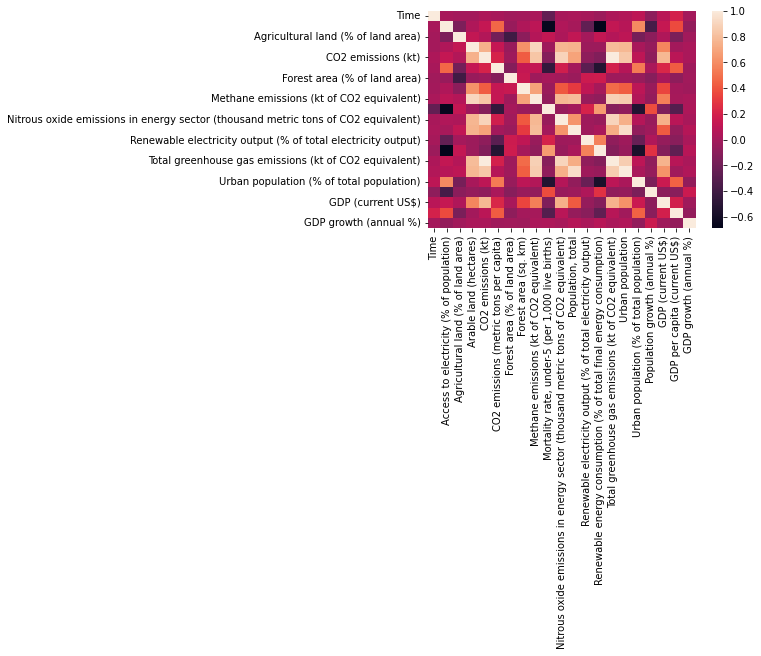

In [12]:
# Find columns that has correlation with climate change
corr = clean_df.corr()
sns.heatmap(corr)

plt.show()


In [16]:
# Get column with correlation with climage change
interest_col = corr[corr['CO2 emissions (kt)']
                    >= .5]['CO2 emissions (kt)'].index.values
# interest_col.append(['Country Name', 'Time'])

# Create new dataframe contain column of interest
new_df = clean_df[['Country Name', 'Time']]
new_df[interest_col] = clean_df[interest_col].values

# Get dataset info
new_df.info()


/tmp/ipykernel_1830/799693136.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[interest_col] = clean_df[interest_col].values
/tmp/ipykernel_1830/799693136.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[interest_col] = clean_df[interest_col].values
/tmp/ipykernel_1830/799693136.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6510 entries, 0 to 6509
Data columns (total 10 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Country Name                                                                       6510 non-null   object 
 1   Time                                                                               6510 non-null   float64
 2   Arable land (hectares)                                                             6510 non-null   float64
 3   CO2 emissions (kt)                                                                 6510 non-null   float64
 4   Methane emissions (kt of CO2 equivalent)                                           6510 non-null   float64
 5   Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent)  6510 non-null   float

/tmp/ipykernel_1830/799693136.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[interest_col] = clean_df[interest_col].values
/tmp/ipykernel_1830/799693136.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[interest_col] = clean_df[interest_col].values


In [17]:
#  Export new reduced dimension dataset
new_df.to_csv(DATA_PATH + "clean/climate-new.csv", index=False)
